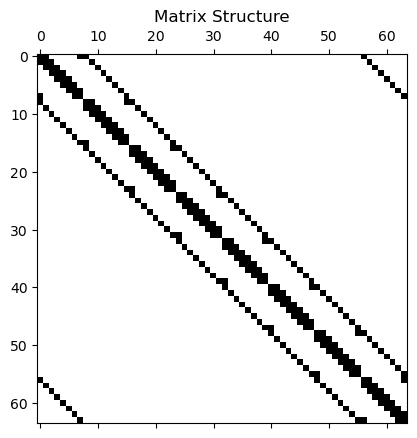

[[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]]
(64, 64)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

m = 8    # N value in x and y directions
n = m * m  # total size of matrix
dx = 20 / m

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(), 
             e2.flatten(), -4 * e1.flatten(), e3.flatten(), 
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()

matA /= dx**2

# Plot matrix structure
plt.figure(5)
plt.spy(matA)
plt.title('Matrix Structure')
plt.show()
print(matA)

A1 = matA
print(A1.shape)

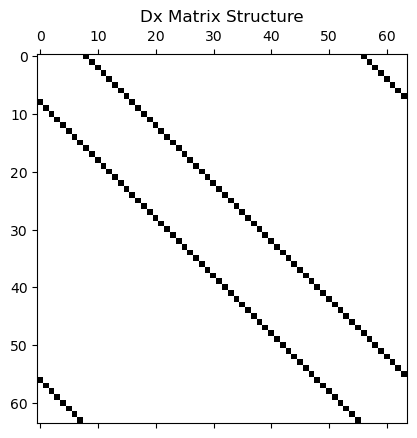

Dx matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of Dx: (64, 64)


In [3]:
e1 = np.ones((n, 1))   # vector of ones

# dx matrix (finite differences across columns, vertical neighbors)
dx_diagonals = [e1.flatten(), -e1.flatten(), e1.flatten(), -e1.flatten()]
dx_offsets = [-(n-m), -m, m, n - m]
dxmat = spdiags(dx_diagonals, dx_offsets, n, n).toarray() 

dxmat /= 2*dx

# Plot Dx matrix structure
plt.figure()
plt.spy(dxmat)
plt.title('Dx Matrix Structure')
plt.show()

# Print Dx matrix and its shape
print("Dx matrix:")
# Print the matrix
print(dxmat)
print("Shape of Dx:", dxmat.shape)

A2 = dxmat

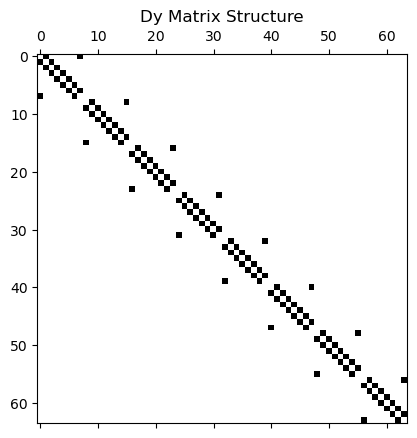

Dy matrix:
[[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]
Shape of Dy: (64, 64)


In [5]:
e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# dy matrix 
dy_diagonals = [e5.flatten(), -e2.flatten(), e3.flatten(), -e4.flatten()]
dy_offsets = [-m+1, -1, 1, m-1]
dymat = spdiags(dy_diagonals, dy_offsets, n, n).toarray() 

dymat /= 2*dx

# Plot Dy matrix structure
plt.figure()
plt.spy(dymat)
plt.title('Dy Matrix Structure')
plt.show()

# Print Dy matrix and its shape
print("Dy matrix:")
# Print the matrix
print(dymat)
print("Shape of Dy:", dymat.shape)

A3 = dymat